In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
import pickle

In [2]:
def print_report_from_df(report_df, title_conf_matrix):
    print(classification_report(report_df["anomalo"], report_df["pred_anomalo"]))
    conf_mat = confusion_matrix(report_df["anomalo"], report_df["pred_anomalo"])
    x_axis_labels = ["pred_seguro","pred_anomalo"] # labels for x-axis
    y_axis_labels = ["seguro","anomalo"] # labels for y-axis
    sns.heatmap(conf_mat, annot=True, fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels).set_title(title_conf_matrix)
    plt.show()
    
    """
    fpr, tpr, thresholds = roc_curve(report_df["anomalo"], report_df["pred_anomalo"], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.title('Curva ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    """
    
def detect_with_kmeans(kmeans_model, tuple_data, max_distance):
    distances_2_centroids = kmeans_model.transform([tuple_data])
    closest_centroid = np.argmin(distances_2_centroids)
    anomal_tuple = False
    if distances_2_centroids[0][closest_centroid] > max_distance:
        anomal_tuple = True
    return anomal_tuple

# Mountaincar

In [3]:
mountaincar_kmeans_filepath = "kmeans_mountaincar_2048c_norm.pkl"
normalize = True

mountaincar_kmeans_model = pickle.load(open(mountaincar_kmeans_filepath, "rb"))
if normalize:
    mountaincar_norm_filepath = "minmaxscaler_mountaincar.pkl"
    mountaincar_min_max_scaler = pickle.load(open(mountaincar_norm_filepath, "rb"))

## Estudio mejor threshold Mountaincar

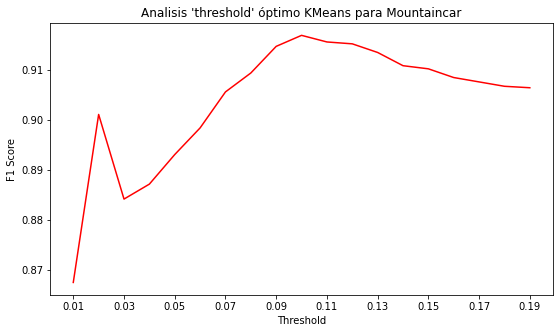

In [4]:
mountaincar_report_filename = "../resultados_clasificadores_tfm/mountaincar_classification_50%_+-005.csv"
mountaincar_report = pd.read_csv(mountaincar_report_filename)

idx_to_drop = []
prev_anomalo = False
for idx, row in mountaincar_report.iterrows():
    actual_anomalo = row["anomalo"]
    if prev_anomalo==True and actual_anomalo==False:
        idx_to_drop.append(idx)
    prev_anomalo = actual_anomalo
mountaincar_report.drop(idx_to_drop, axis=0, inplace=True)

mountaincar_report_sample = mountaincar_report.sample(3000, ignore_index=True)
array_f1_score = []

for threshold in np.arange(0.01, 0.2, 0.01):
    df_resultados = pd.DataFrame(columns=["anomalo", "pred_anomalo"])
    for row in mountaincar_report_sample.values:
        anomalo = row[-1]
        tuple_data = row[:-1]
        if normalize:
            tuple_data = mountaincar_min_max_scaler.transform([tuple_data])[0]
        pred_anomalo = detect_with_kmeans(mountaincar_kmeans_model, tuple_data, threshold)
        df_resultados.loc[len(df_resultados)] = [anomalo, pred_anomalo]
    f1_score_iteracion = f1_score(df_resultados["anomalo"], df_resultados["pred_anomalo"])
    array_f1_score.append(f1_score_iteracion)
    
plt.figure(figsize=(9, 5))
plt.plot([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19],array_f1_score,'r')
plt.title("Analisis 'threshold' óptimo KMeans para Mountaincar")
plt.xlabel("Threshold")
plt.xticks([0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19])
plt.ylabel("F1 Score")
plt.show()

### +-005

              precision    recall  f1-score   support

       False       0.75      0.99      0.86      7565
        True       1.00      0.84      0.91     15196

    accuracy                           0.89     22761
   macro avg       0.87      0.92      0.88     22761
weighted avg       0.92      0.89      0.89     22761



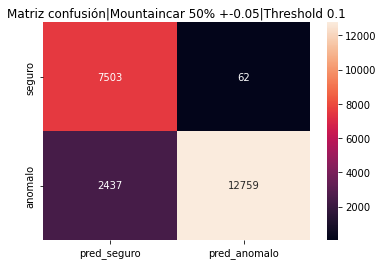

In [15]:
mountaincar_report_filename = "../resultados_clasificadores_tfm/mountaincar_classification_50%_+-005.csv"
mountaincar_report = pd.read_csv(mountaincar_report_filename)
    
idx_to_drop = []
prev_anomalo = False
for idx, row in mountaincar_report.iterrows():
    actual_anomalo = row["anomalo"]
    if prev_anomalo==True and actual_anomalo==False:
        idx_to_drop.append(idx)
    prev_anomalo = actual_anomalo
mountaincar_report.drop(idx_to_drop, axis=0, inplace=True)

df_resultados = pd.DataFrame(columns=["anomalo", "pred_anomalo"])
for row in mountaincar_report.values:
    anomalo = row[-1]
    tuple_data = row[:-1]
    if normalize:
        tuple_data = mountaincar_min_max_scaler.transform([tuple_data])[0]
    pred_anomalo = detect_with_kmeans(mountaincar_kmeans_model, tuple_data, 0.1)
    df_resultados.loc[len(df_resultados)] = [anomalo, pred_anomalo]
print_report_from_df(df_resultados, "Matriz confusión|Mountaincar 50% +-0.05|Threshold 0.1")

### +-01

              precision    recall  f1-score   support

       False       0.93      0.99      0.96     15219
        True       0.99      0.96      0.98     30266

    accuracy                           0.97     45485
   macro avg       0.96      0.98      0.97     45485
weighted avg       0.97      0.97      0.97     45485



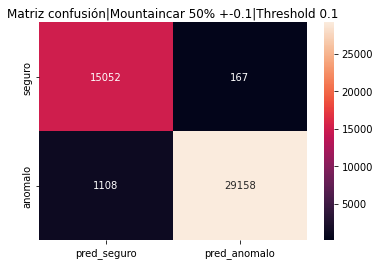

In [16]:
mountaincar_report_filename = "../resultados_clasificadores_tfm/mountaincar_classification_50%_+-01.csv"
mountaincar_report = pd.read_csv(mountaincar_report_filename)
    
idx_to_drop = []
prev_anomalo = False
for idx, row in mountaincar_report.iterrows():
    actual_anomalo = row["anomalo"]
    if prev_anomalo==True and actual_anomalo==False:
        idx_to_drop.append(idx)
    prev_anomalo = actual_anomalo
mountaincar_report.drop(idx_to_drop, axis=0, inplace=True)

df_resultados = pd.DataFrame(columns=["anomalo", "pred_anomalo"])
for row in mountaincar_report.values:
    anomalo = row[-1]
    tuple_data = row[:-1]
    if normalize:
        tuple_data = mountaincar_min_max_scaler.transform([tuple_data])[0]
    pred_anomalo = detect_with_kmeans(mountaincar_kmeans_model, tuple_data, 0.1)
    df_resultados.loc[len(df_resultados)] = [anomalo, pred_anomalo]
print_report_from_df(df_resultados, "Matriz confusión|Mountaincar 50% +-0.1|Threshold 0.1")

# Cartpole

In [7]:
cartpole_kmeans_filepath = "kmeans_cartpole_2048c_norm.pkl"
normalize = True

cartpole_kmeans_model = pickle.load(open(cartpole_kmeans_filepath, "rb"))
if normalize:
    cartpole_norm_filepath = "minmaxscaler_cartpole.pkl"
    cartpole_min_max_scaler = pickle.load(open(cartpole_norm_filepath, "rb"))

## Estudio mejor threshold para Cartpole

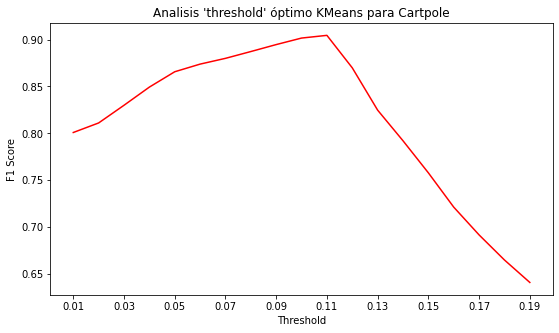

In [10]:
cartpole_report_filename = "../resultados_clasificadores_tfm/cartpole_classification_50%_+-005.csv"
cartpole_report = pd.read_csv(cartpole_report_filename)

idx_to_drop = []
prev_anomalo = False
for idx, row in cartpole_report.iterrows():
    actual_anomalo = row["anomalo"]
    if prev_anomalo==True and actual_anomalo==False:
        idx_to_drop.append(idx)
    prev_anomalo = actual_anomalo
cartpole_report.drop(idx_to_drop, axis=0, inplace=True)

cartpole_report_sample = cartpole_report.sample(3000, ignore_index=True)
array_f1_score = []

for threshold in np.arange(0.01, 0.2, 0.01):
    df_resultados = pd.DataFrame(columns=["anomalo", "pred_anomalo"])
    for row in cartpole_report_sample.values:
        anomalo = row[-1]
        tuple_data = row[:-1]
        if normalize:
            tuple_data = cartpole_min_max_scaler.transform([tuple_data])[0]
        pred_anomalo = detect_with_kmeans(cartpole_kmeans_model, tuple_data, threshold)
        df_resultados.loc[len(df_resultados)] = [anomalo, pred_anomalo]
    f1_score_iteracion = f1_score(df_resultados["anomalo"], df_resultados["pred_anomalo"])
    array_f1_score.append(f1_score_iteracion)
    
plt.figure(figsize=(9, 5))
plt.plot([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19],array_f1_score,'r')
plt.title("Analisis 'threshold' óptimo KMeans para Cartpole")
plt.xlabel("Threshold")
plt.xticks([0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19])
plt.ylabel("F1 Score")
plt.show()

### +-005

              precision    recall  f1-score   support

       False       0.87      0.72      0.79      2418
        True       0.87      0.94      0.90      4590

    accuracy                           0.87      7008
   macro avg       0.87      0.83      0.85      7008
weighted avg       0.87      0.87      0.86      7008



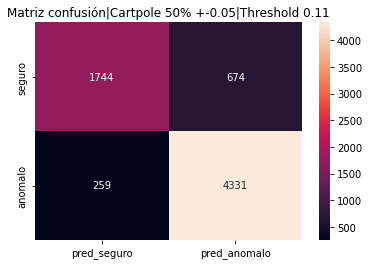

In [17]:
cartpole_report_filename = "../resultados_clasificadores_tfm/cartpole_classification_50%_+-005.csv"
cartpole_report = pd.read_csv(cartpole_report_filename)
    
idx_to_drop = []
prev_anomalo = False
for idx, row in cartpole_report.iterrows():
    actual_anomalo = row["anomalo"]
    if prev_anomalo==True and actual_anomalo==False:
        idx_to_drop.append(idx)
    prev_anomalo = actual_anomalo
cartpole_report.drop(idx_to_drop, axis=0, inplace=True)

df_resultados = pd.DataFrame(columns=["anomalo", "pred_anomalo"])
for row in cartpole_report.values:
    anomalo = row[-1]
    tuple_data = row[:-1]
    if normalize:
        tuple_data = cartpole_min_max_scaler.transform([tuple_data])[0]
    pred_anomalo = detect_with_kmeans(cartpole_kmeans_model, tuple_data, 0.11)
    df_resultados.loc[len(df_resultados)] = [anomalo, pred_anomalo]
print_report_from_df(df_resultados, "Matriz confusión|Cartpole 50% +-0.05|Threshold 0.11")

### +-01

              precision    recall  f1-score   support

       False       0.97      0.74      0.84       823
        True       0.85      0.99      0.91      1238

    accuracy                           0.89      2061
   macro avg       0.91      0.86      0.87      2061
weighted avg       0.90      0.89      0.88      2061



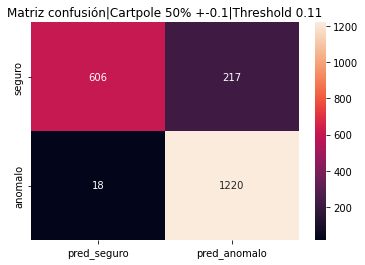

In [18]:
cartpole_report_filename = "../resultados_clasificadores_tfm/cartpole_classification_50%_+-01.csv"
cartpole_report = pd.read_csv(cartpole_report_filename)
    
idx_to_drop = []
prev_anomalo = False
for idx, row in cartpole_report.iterrows():
    actual_anomalo = row["anomalo"]
    if prev_anomalo==True and actual_anomalo==False:
        idx_to_drop.append(idx)
    prev_anomalo = actual_anomalo
cartpole_report.drop(idx_to_drop, axis=0, inplace=True)

df_resultados = pd.DataFrame(columns=["anomalo", "pred_anomalo"])
for row in cartpole_report.values:
    anomalo = row[-1]
    tuple_data = row[:-1]
    if normalize:
        tuple_data = cartpole_min_max_scaler.transform([tuple_data])[0]
    pred_anomalo = detect_with_kmeans(cartpole_kmeans_model, tuple_data, 0.11)
    df_resultados.loc[len(df_resultados)] = [anomalo, pred_anomalo]
print_report_from_df(df_resultados, "Matriz confusión|Cartpole 50% +-0.1|Threshold 0.11")